# Part I. One-sided finite differences

Write a function, `deriv`, which computes a derivative of its argument at a given point, $x$, using a one-sided finite difference rule with a given step side $h$, with the approximation order of $O(h^2)$. 

In [1]:
def deriv(f, x, h):
    """ Compute a derivative of `f` at point `x` with step size `h`.
    
    Compute the derivative using the one-sided rule of the approximation order of $O(h^2)$.
    
    Parameters
    ----------
    f : callable
        The function to differentiate
    x : float
        The point to compute the derivative at.
    h : float
        The step size for the finite different rule.
        
    Returns
    -------
    fder : derivative of f(x) at point x using the step size h.
    """
    fdel = -1.5*f(x)+2*f(x+h)-0.5*f(x+2*h)
    return fdel/h

#### Test I.1

Test your function on a simple test case: differentiate $f(x) = x^3$ at $x=0$. Comment on whether your results are consistent with the expected value of $f'(x) = 0$ and on an expected scaling with $h\to 0$.

 (10% of the total grade)

In [2]:
x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5,1e-6,1e-7,1e-8,1e-10,1e-23]:
    err = deriv(lambda x: x**3, x, h)
    print("%f -- %g" % (h, err))

0.010000 -- -0.0002
0.001000 -- -2e-06
0.000100 -- -2e-08
0.000010 -- -2e-10
0.000001 -- -2e-12
0.000000 -- -2e-14
0.000000 -- -2e-16
0.000000 -- -2e-20
0.000000 -- -2e-46


#### We can see, that result $\rightarrow$ 0 when h $\rightarrow$ 0, like $h^2$ and our numerical derivate goes to its analytical value.

### Test I.2

Now use a slightly more complicated function, $f(x) = x^2 \log{x}$, evaluate the derivative at $x=1$ using your one-sided rule and a two-point one-sided rule. Roughly estimate the value of $h$ where the error stops decreasing, for these two schemes. 
(15% of the total grade)

In [3]:
from math import log
import numpy as np
from matplotlib import pyplot as plt

def f(x):
    return x**2 * log(x)
    
def fder(x):
    return x * (2.*log(x) + 1)

0.9999999998060443 1.0000000089225287 0.9999999999735779


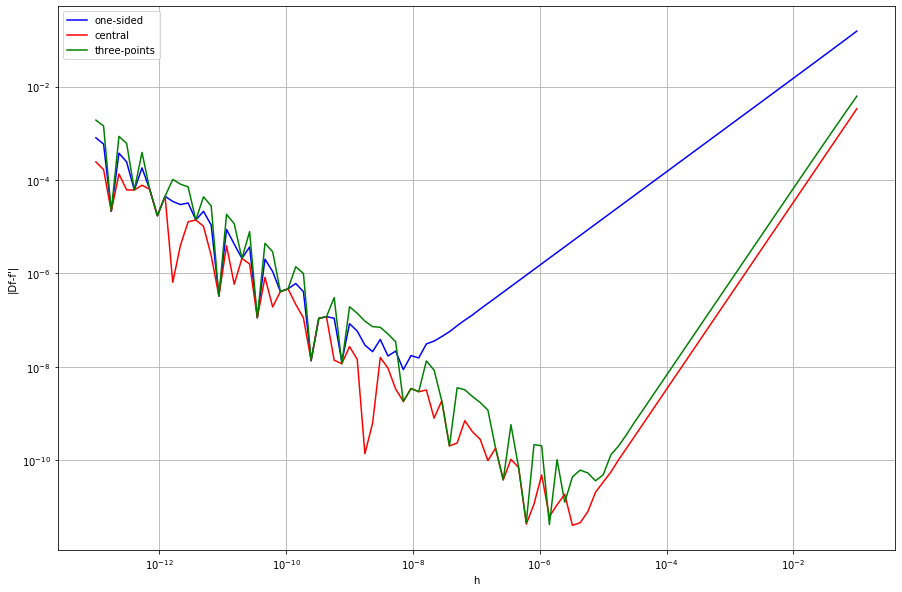

In [4]:
def der2(f,x,h):
    fdel = f(x+h)-f(x)
    return fdel/h

def der2c(f,x,h):
    fdel = f(x+h)-f(x-h)
    return fdel/2/h

x = 1
h_arr=np.logspace(-13,-1,num=100)

df_3_arr = np.array([])
df_forward_arr=np.array([])
df_central_arr=np.array([])

for h in h_arr:
    df_3_arr = np.append(df_3_arr,np.abs(deriv(f,x,h)-fder(x)))
    df_forward_arr=np.append(df_forward_arr,np.abs(der2(f,x,h)-fder(x)))
    df_central_arr=np.append(df_central_arr,np.abs(der2c(f,x,h)-fder(x)))
   
    
plt.figure(figsize=(15,10))    
plt.loglog(h_arr,df_forward_arr,'b-',label='one-sided')
plt.loglog(h_arr,df_central_arr,'r-',label='central')
plt.loglog(h_arr,df_3_arr,'g-',label='three-points')
plt.xlabel('h')
plt.ylabel('|Df-f\'|')
plt.grid()
plt.legend()


print(deriv(f,1,1e-6),der2(f,1,1e-8),der2c(f,1,1e-6))

#### 1) I add a central derivative to see the difference between its and three-pointed rule.
#### 2) We can see that the optimal value of h is 1e-8 for two-points forward rule, 1e-6 for two-points central and three-points forward rules.

### Test I.3 

Now try differentiating $x^2 \log(x)$ at $x=0$. Use the three-point one-sided rule. Note that to evaluate the function at zero, you need to special-case this value. Check the scaling of the error with $h$, explain your results. 
(25% of the total grade)

In [92]:
def f(x):
    if x == 0:
        # the limit of $x^2 log(x)$ at $x-> 0$ is zero, even though log(x) is undefined at x=0
        return 0.0
    else:
        return x**2 * log(x)
    
def fder(x):
    if x == 0:
        return 0.0
    else:
        return x*(2*log(x) + 1)

x = 0
for h in [1e-2, 1e-3, 1e-4, 1e-5]:
    err = deriv(f, x, h) - fder(x)
    err2 = der2(f,x,h) - fder(x)
    print("%5f -- %7.4g -- %7.4g" % (h, err,err2))

0.010000 -- -0.01386 -- -0.04605
0.001000 -- -0.001386 -- -0.006908
0.000100 -- -0.0001386 -- -0.000921
0.000010 -- -1.386e-05 -- -0.0001151


#### We can see that the rate of converge becomes linear. We know that our decomposition looks like: $f + f'h + f''/2 h^2 + f'''/6 h^3 + ...$ zero, first and second orders goes to our formula, and defining order is the third, which looks like$\approx \frac{1}{h}\cdot h^3 = h^2$. After it we divide oh $h$ and get $O(h)$.

# Part II. Midpoint rule 

Write a function which computes a definite integral using the midpoint rule up to a given error, $\epsilon$. Estimate the error by comparing the estimates of the integral at $N$ and $2N$ elementary intervals. 

In [88]:
def midpoint_rule(func, a, b, eps):
    """ Calculate the integral of f from a to b using the midpoint rule.
    
    Parameters
    ----------
    func : callable
        The function to integrate.
    a : float
        The lower limit of integration.
    b : float
        The upper limit of integration.
    eps : float
        The target accuracy of the estimate.
        
    Returns
    -------
    integral : float
        The estimate of $\int_a^b f(x) dx$.
    """
    
    I_n = np.array([(b-a)*func((a+b)/2)])
    n = 2
    while True:
        x_n = np.linspace(a,b,n+1)
        h = np.array([])
        Q = np.zeros(n)
        i = 0
        h = x_n[1]-x_n[0]
        while i < n:
            Q[i]= h*func((x_n[i+1]+x_n[i])/2)
            i += 1 
        I = np.sum(Q)
        I_n = np.append(I_n,I)
        if np.abs(I_n[int(np.log2(n))-1]-I_n[int(np.log2(n/2))-1])< eps:
            break
        n *= 2
    return round(I_n[int(np.log2(n/2))-1],-int(np.log10(eps))), I_n, I_n.shape[0]

### Test II.1

Test your midpoint rule on a simple integral, which you can calculate by paper and pencil.

Compare the rate of convergence to the expected $O(N^{-2})$ scaling by studying the number of intervals required for a given accuracy $\epsilon$.

Compare the numerical results to the value you calculated by hand. Does the deviation agree with your estimate of the numerical error?
(20% of the total grade)


In [89]:
print(abs(2 - midpoint_rule(lambda y: np.sin(y),0,np.pi,1e-5)[0]))

1.0000000000065512e-05


#### We can see, that error $\epsilon$ has the same order than predicted.

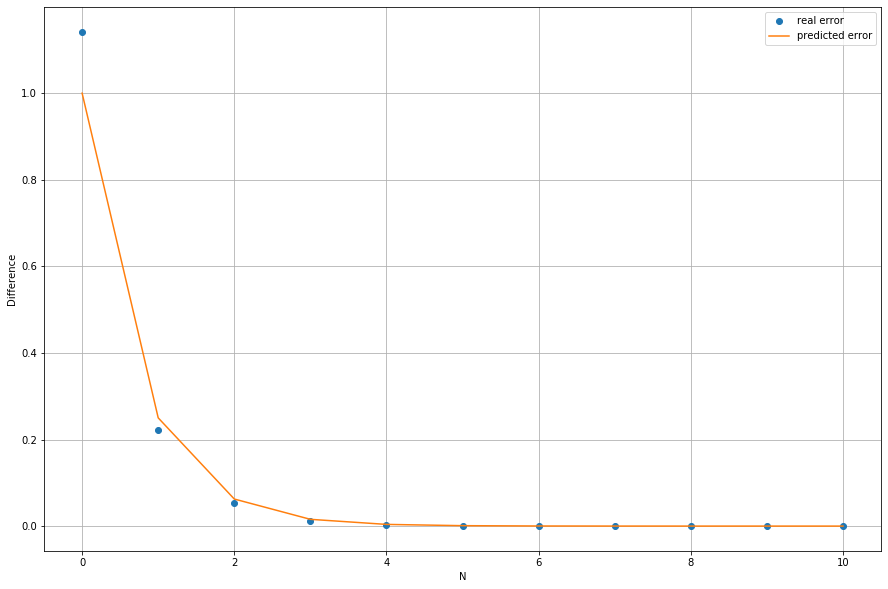

In [90]:
def f_err(x):
    return 1/x**2
plt.figure(figsize=(15,10))  
l = np.linspace(0,midpoint_rule(lambda x: np.sin(x),0,np.pi,1e-5)[2]-1,midpoint_rule(lambda x: np.sin(x),0,np.pi,1e-5)[2]) 
plt.plot(l,np.abs(midpoint_rule(lambda x: np.sin(x),0,np.pi,1e-5)[1]-2),'o',label='real error')
plt.plot(l, f_err(2**l),label='predicted error')
plt.xlabel('N')
plt.ylabel('Difference')
plt.grid()
plt.legend()

#### We can see that the rate of converge are the same: $O(N^{-2})$.

### Test II.2

Now use your midpoint rule to compute the value of

$$
\int_0^1\! \frac{\sin{\sqrt{x}}}{x}\, dx
$$

up to a predefined accuracy of $\epsilon=10^{-4}$.

Note that the integral contains an integrable singularity at the lower limit. Do calculations two ways: first, do a straightforward computation; next, subtract the singularity. Compare the number of iterations required to achieve the accuracy of $\epsilon$.

(30% of the total grade)

In [91]:
def func(x):
    return np.sin(np.sqrt(x))/x
def func1(x):
    return np.sin(np.sqrt(x))/x - 1/np.sqrt(x)
def func2(x):
    return 1/np.sqrt(x)
I_1,q1,n1= midpoint_rule(func,0,1,1e-4)
I_2 = midpoint_rule(func1,0,1,1e-4)[0] + 2
n2 = midpoint_rule(func1,0,1,1e-4)[2]
print(I_1,n1)
print(I_2,n2)

1.8919 25
1.892 7


$\int\limits_0^1\! \dfrac{1}{\sqrt{x}}dx = 2 \int\limits_0^1\! d\sqrt{x} =2$